# Deep Residual  Attention U-Net (ResUNet)
Paper: https://arxiv.org/pdf/1711.10684.pdf

ResUNet, a semantic segmentation model inspired by the deep residual learning and UNet. An architecture that take advantages from both(Residual and UNet) models. The residual unit will ease the training of the network. The skip connections within a residual unit and between low levels and high levels of the network will facilitate information propagation without degradation,making it possible to design a neural network with much fewer
parameters

<img src="images/result.png">

In [1]:
## Imports
import os
import sys
import random

import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from models import AttentionUNet, ResUNet

from utils import jacard_coef, dice_coef, dice_loss, focal_loss, combined_loss
from keras.callbacks import EarlyStopping

## Seeding
seed = 2019
random.seed = seed
np.random.seed = seed
tf.seed = seed

In [2]:
src_images = np.load('dataset/train_images.npy')
tar_images = np.load('dataset/train_masks.npy')
src_test_images = np.load('dataset/test_images.npy')
tar_test_images = np.load('dataset/test_masks.npy')

In [3]:
model = ResUNet(image_size = 128).get_model()
adam = keras.optimizers.Adam()
model.compile(optimizer=adam, loss=[dice_loss], metrics=[jacard_coef])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.fit(src_images,tar_images,validation_split = 0.1,batch_size = 5,epochs = 30, callbacks=[early_stopping])


Epoch 1/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 38s 293ms/step - jacard_coef: 0.4960 - loss: 0.3653 - val_jacard_coef: 7.1560e-04 - val_loss: 0.9986
Epoch 2/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 23s 281ms/step - jacard_coef: 0.6832 - loss: 0.1892 - val_jacard_coef: 7.1117e-07 - val_loss: 1.0000
Epoch 3/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 23s 283ms/step - jacard_coef: 0.6952 - loss: 0.1804 - val_jacard_coef: 0.0174 - val_loss: 0.9666
Epoch 4/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 23s 284ms/step - jacard_coef: 0.7035 - loss: 0.1744 - val_jacard_coef: 0.2920 - val_loss: 0.5541
Epoch 5/30
17/81 ━━━━━━━━━━━━━━━━━━━━ 17s 277ms/step - jacard_coef: 0.7093 - loss: 0.1711

KeyboardInterrupt: 

##Inference

In [21]:
pred = model.predict(src_test_images)
print(dice_coef(tar_test_images,pred))
print(jacard_coef(tar_test_images,pred))


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step
tf.Tensor(0.79101807, shape=(), dtype=float32)
tf.Tensor(0.6542844, shape=(), dtype=float32)


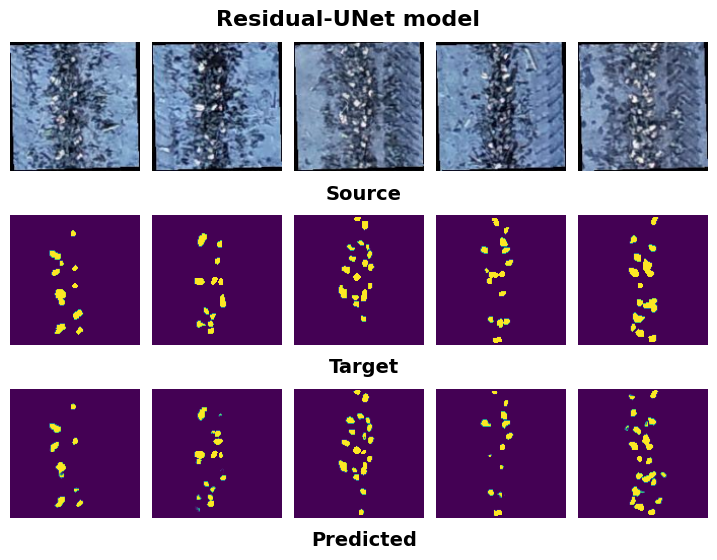

In [23]:
n_samples = 5
# Assuming 'expected' contains your ground truth images and 'pred' contains predicted images
plt.figure(figsize=(9, 6))

for i in range(n_samples):
    # Plot actual image
    plt.subplot(3, n_samples, 1 + i)
    plt.axis('off')
    plt.imshow(src_test_images[i])

    # Plot expected image
    plt.subplot(3, n_samples, 1 +  n_samples + i)
    plt.axis('off')
    plt.imshow(tar_test_images[i])

    # Plot predicted image
    plt.subplot(3, n_samples, 1 + 2 * n_samples + i)
    plt.axis('off')
    plt.imshow(pred[i])


plt.subplot(3, n_samples, 1)
plt.text(350, 150, 'Source', va='center', ha='center', rotation=0, fontsize=14, weight='bold')

plt.subplot(3, n_samples, 1 + n_samples)
plt.text(350, 150, 'Target', va='center', ha='center', rotation=0, fontsize=14, weight='bold')

plt.subplot(3, n_samples, 1 + 2 * n_samples)
plt.text(350, 150, 'Predicted', va='center', ha='center', rotation=0, fontsize=14, weight='bold')

plt.suptitle('Residual-UNet model', fontsize=16, weight='bold')
# Adjust layout to fit titles
plt.subplots_adjust(wspace=0.1, hspace=0.1, top=0.95)

plt.show()